#IEOR 142
##HW3 Problem 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

In [ ]:
train = pd.read_csv('yelp142_train.csv')
test = pd.read_csv('yelp142_test.csv')
display(train.head(), test.head())

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,16,(Missing),'none',TRUE,'no',FALSE,(Missing),FALSE,FALSE,TRUE,(Missing),FALSE
1,3.5,537,TRUE,'beer_and_wine',TRUE,'no',TRUE,(Missing),TRUE,FALSE,TRUE,FALSE,TRUE
2,3.0,444,TRUE,'full_bar',TRUE,'no',TRUE,(Missing),TRUE,TRUE,TRUE,FALSE,TRUE
3,3.0,4,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
4,5.0,3,(Missing),(Missing),TRUE,'no',(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),(Missing)


,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.5,99,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,FALSE,TRUE
1,4.0,5,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),(Missing)
2,2.0,20,TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
3,1.5,40,(Missing),'none',(Missing),'no',FALSE,(Missing),(Missing),FALSE,(Missing),(Missing),(Missing)
4,4.0,19,TRUE,(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


##Q2a

In [ ]:
for a in train.columns:
  print(train[a].value_counts() / train[a].value_counts().sum())

4.0    0.245217
3.5    0.208546
4.5    0.154656
3.0    0.154177
2.5    0.106027
2.0    0.064254
5.0    0.041932
1.5    0.019770
1.0    0.005421
Name: stars, dtype: float64
3       0.046875
4       0.035714
5       0.028061
6       0.023278
7       0.021684
          ...   
550     0.000159
2919    0.000159
923     0.000159
591     0.000159
1336    0.000159
Name: review_count, Length: 877, dtype: float64
TRUE         0.587851
(Missing)    0.295918
FALSE        0.116231
Name: GoodForKids, dtype: float64
(Missing)          0.339445
'none'             0.331792
'full_bar'         0.227360
'beer_and_wine'    0.101403
Name: Alcohol, dtype: float64
TRUE         0.926020
(Missing)    0.058833
FALSE        0.015147
Name: BusinessAcceptsCreditCards, dtype: float64
'no'         0.339605
'free'       0.330517
(Missing)    0.321588
'paid'       0.008291
Name: WiFi, dtype: float64
TRUE         0.483418
(Missing)    0.292251
FALSE        0.224330
Name: BikeParking, dtype: float64
(Missing)    0.876754

(Missing) can be treated as an explicit category because there are so many variables with a large portion of their data labeled as a missing value. For example, the column ByAppointmentOnly has almost 88 percent of its data labeled as a missing value. When there is a large number of missing values, it can be useful to categorize those missing values as a new category and use them as additional features of the model. There must be a reason why there are so many missing values. By making (Missing) into a new category, it also allows us to use all the data instead of removing every row with missing values.

##Q2bi

In [ ]:
train.columns

Index(['stars', 'review_count', 'GoodForKids', 'Alcohol',
       'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking',
       'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating',
       'RestaurantsReservations', 'DogsAllowed', 'Caters'],
      dtype='object')

In [ ]:
ols1 = smf.ols(formula= "stars ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + \
C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))\
 + C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, Treatment(reference='(Missing)')) + \
 C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, Treatment(reference='(Missing)')) \
 + C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, Treatment(reference='(Missing)')) + \
 C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, Treatment(reference='(Missing)'))", data = train)
bi = ols1.fit()
bi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.38
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.46e-235
Time:                        13:21:08   Log-Likelihood:                -7239.0
No. Observations:                6272   AIC:                         1.453e+04
Df Residuals:                    6246   BIC:                         1.471e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    3.4062      0.040     84.470      0.000       3.327       3.485
C(GoodForKids, Treatment(reference='(Missing)'))[T.FALSE]                    0.0196      0.045      0.434      0.664      -0.069       0.108
C(GoodForKids, Treatment(reference='(Missing)'))[T.TRUE]                    -0.0966      0.035     -2.759      0.006      -0.165      -0.028
C(Alcohol, Treatment(reference='(Missing)'))[T.'beer_and_wine']              0.2451      0.048      5.129      0.000       0.151       0.339
C(Alcohol, Treatment(reference='(Missing)'))[T.'full_bar']                   0.1200      0.044      2.732      0.006       0.034       0.206
C(Alcohol, Treatment(reference='(Missing)'))[T.'none']                       0.1211      0.040      3.046      0.002       0.043       0.199
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.FALSE]     0.4796      0.090      5.318      0.000       0.303       0.656
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.TRUE]      0.0513      0.047      1.089      0.276      -0.041       0.144
C(WiFi, Treatment(reference='(Missing)'))[T.'free']                          0.1519      0.034      4.438      0.000       0.085       0.219
C(WiFi, Treatment(reference='(Missing)'))[T.'no']                            0.1468      0.033      4.442      0.000       0.082       0.212
C(WiFi, Treatment(reference='(Missing)'))[T.'paid']                         -0.2846      0.110     -2.581      0.010      -0.501      -0.068
C(BikeParking, Treatment(reference='(Missing)'))[T.FALSE]                   -0.2009      0.032     -6.284      0.000      -0.264      -0.138
C(BikeParking, Treatment(reference='(Missing)'))[T.TRUE]                    -0.1200      0.029     -4.177      0.000      -0.176      -0.064
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.FALSE]              0.1270      0.033      3.797      0.000       0.061       0.193
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.TRUE]               0.2601      0.098      2.667      0.008       0.069       0.451
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.FALSE]          0.7377      0.092      8.011      0.000       0.557       0.918
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.TRUE]           0.3651      0.027     13.284      0.000       0.311       0.419
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.FALSE]                -0.1359      0.040     -3.389      0.001      -0.215      -0.057
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.TRUE]                 -0.0253      0.043     -0.591      0.555      

##Q2bii

In [ ]:
x_train = pd.get_dummies(train.iloc[:, 1:13])
x_test = pd.get_dummies(test.iloc[:, 1:13])
y_train = train['stars']
y_test = test['stars']

In [ ]:
dtc = DecisionTreeRegressor()
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'random_state': [88]}
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'neg_root_mean_squared_error', cv=10, verbose=1)
dtc_cv_acc.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
acc = dtc_cv_acc.cv_results_['mean_test_score']
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data
pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,-0.810687
1,0.0005,-0.771429
2,0.001,-0.763511
3,0.0015,-0.766644
4,0.002,-0.769758
5,0.0025,-0.771188
6,0.003,-0.771101
7,0.0035,-0.773540
8,0.004,-0.774984
9,0.0045,-0.776609


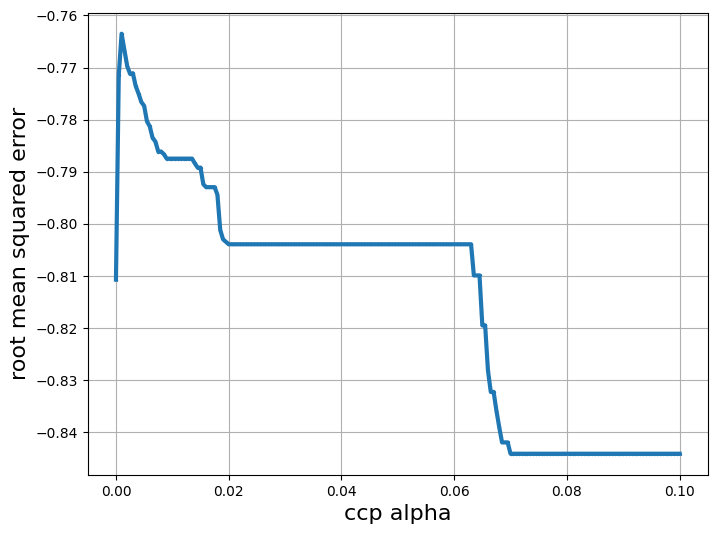

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('root mean squared error', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [ ]:
print('Grid best parameter ccp_alpha (max. rmse): ', dtc_cv_acc. best_params_['ccp_alpha'])
print('Grid best score (rmse): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. rmse):  0.001
Grid best score (rmse):  -0.7635106268726005


##Q2biii

In [ ]:
test.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.5,99,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,FALSE,TRUE
1,4.0,5,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),(Missing)
2,2.0,20,TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
3,1.5,40,(Missing),'none',(Missing),'no',FALSE,(Missing),(Missing),FALSE,(Missing),(Missing),(Missing)
4,4.0,19,TRUE,(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


In [ ]:
def OSR2_linear(model, df_train, df_test, dependent_var):
  y_test = df_test[dependent_var]
  y_pred = model.predict(df_test)
  SSE = np.sum((y_test - y_pred)**2)
  SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)
  return 1 - SSE/SST

def OSR2_tree(model, X_test, y_test, y_train):
  y_pred = model.predict(X_test)
  SSE = np.sum((y_test - y_pred)**2)
  SST = np.sum((y_test - np.mean(y_train))**2)
  return (1 - SSE/SST)

In [ ]:
print('Linear Regression OSR2:', OSR2_linear(bi, train, test, 'stars'))
print('Regression Tree OSR2:', OSR2_tree(dtc_cv_acc, x_test, y_test, y_train))
print('Linear Regression MAE:', mean_absolute_error(bi.predict(test), y_test))
print('Regression Tree MAE:', mean_absolute_error(dtc_cv_acc.predict(x_test),y_test))

Linear Regression OSR2: 0.14799194607877675
Regression Tree OSR2: 0.15312264892389404
Linear Regression MAE: 0.6259556143398649
Regression Tree MAE: 0.6176522091210523


##Q2ci

In [ ]:
train['fourOrAbove'] = train['stars'] >= 4
train['fourOrAbove'] = train['fourOrAbove'].astype(int)
test['fourOrAbove'] = test['stars'] >= 4
test['fourOrAbove'] = test['fourOrAbove'].astype(int)

##Q2dii

In [ ]:
linear_pred = bi.predict(test)
linear_pred_four = (linear_pred >= 4).astype(int)
regression_tree_pred = dtc_cv_acc.predict(x_test)
regression_tree_pred_four = (regression_tree_pred >= 4).astype(int)

##Q2diii

In [ ]:
logreg1 = smf.logit(formula = "fourOrAbove ~ review_count + C(GoodForKids, \
Treatment(reference='(Missing)')) + C(Alcohol, Treatment(reference='(Missing)')) + C(BusinessAcceptsCreditCards, \
Treatment(reference='(Missing)')) + C(WiFi, Treatment(reference='(Missing)')) + C(BikeParking, \
Treatment(reference='(Missing)')) + C(ByAppointmentOnly, Treatment(reference='(Missing)')) + C(WheelechairAccessible, \
Treatment(reference='(Missing)')) + C(OutdoorSeating, Treatment(reference='(Missing)')) + C(RestaurantsReservations, \
Treatment(reference='(Missing)')) + C(DogsAllowed, Treatment(reference='(Missing)')) + C(Caters, \
Treatment(reference='(Missing)'))", data = train).fit()
logreg1.summary()

Optimization terminated successfully.
         Current function value: 0.608425
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Thu, 12 Oct 2023   Pseudo R-squ.:                  0.1135
Time:                        13:36:46   Log-Likelihood:                -3816.0
converged:                       True   LL-Null:                       -4304.8
Covariance Type:            nonrobust   LLR p-value:                3.284e-190
============================================================================================================================================
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   -0.3101      0.107     -2.890      0.004      -0.520      -0.100
C(GoodForKids, Treatment(reference='(Missing)'))[T.FALSE]                    0.2469      0.128      1.934      0.053      -0.003       0.497
C(GoodForKids, Treatment(reference='(Missing)'))[T.TRUE]                    -0.2024      0.099     -2.045      0.041      -0.396      -0.008
C(Alcohol, Treatment(reference='(Missing)'))[T.'beer_and_wine']              0.1748      0.137      1.273      0.203      -0.094       0.444
C(Alcohol, Treatment(reference='(Missing)'))[T.'full_bar']                  -0.2038      0.127     -1.601      0.109      -0.453       0.046
C(Alcohol, Treatment(reference='(Missing)'))[T.'none']                       0.3084      0.114      2.694      0.007       0.084       0.533
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.FALSE]     1.0310      0.255      4.041      0.000       0.531       1.531
C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)'))[T.TRUE]     -0.0309      0.127     -0.244      0.807      -0.279       0.217
C(WiFi, Treatment(reference='(Missing)'))[T.'free']                          0.4209      0.097      4.328      0.000       0.230       0.612
C(WiFi, Treatment(reference='(Missing)'))[T.'no']                            0.3314      0.094      3.514      0.000       0.147       0.516
C(WiFi, Treatment(reference='(Missing)'))[T.'paid']                         -0.7700      0.363     -2.123      0.034      -1.481      -0.059
C(BikeParking, Treatment(reference='(Missing)'))[T.FALSE]                   -0.4982      0.092     -5.399      0.000      -0.679      -0.317
C(BikeParking, Treatment(reference='(Missing)'))[T.TRUE]                    -0.3079      0.081     -3.800      0.000      -0.467      -0.149
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.FALSE]              0.4357      0.097      4.512      0.000       0.246       0.625
C(ByAppointmentOnly, Treatment(reference='(Missing)'))[T.TRUE]               0.3991      0.290      1.374      0.169      -0.170       0.968
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.FALSE]          2.0350      0.338      6.021      0.000       1.373       2.697
C(WheelechairAccessible, Treatment(reference='(Missing)'))[T.TRUE]           0.9324      0.076     12.309      0.000       0.784       1.081
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.FALSE]                -0.3339      0.113     -2.956      0.003      -0.555      -0.113
C(OutdoorSeating, Treatment(reference='(Missing)'))[T.TRUE]                 -0.1566      0.120     -1.304      0.192      -0.392       0.079
C(RestaurantsReservations, Treatment(reference='(Missing)'))[T.FALSE]       -0.4197      0.116     -3.631      0.000      -0.646      -0.19

##Q2div

In [ ]:
x_train2 = pd.get_dummies(train.iloc[:, 1:13])
x_test2 = pd.get_dummies(test.iloc[:, 1:13])
y_train2 = train['fourOrAbove']
y_test2 = test['fourOrAbove']

In [ ]:
dtc2 = DecisionTreeClassifier()
grid_values2 = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'random_state': [88]}
dtc_cv_acc2 = GridSearchCV(dtc2, param_grid = grid_values2, cv=10, verbose=1)
dtc = dtc_cv_acc2.fit(x_train2, y_train2)
dtc

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             verbose=1)

In [ ]:
acc2 = dtc.cv_results_['mean_test_score']
ccp2 = dtc.cv_results_['param_ccp_alpha'].data
pd.DataFrame({'ccp alpha' : ccp2, 'Validation Accuracy': acc2}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,0.639194
1,0.0005,0.654179
2,0.001,0.648598
3,0.0015,0.652741
4,0.002,0.654815
5,0.0025,0.654815
6,0.003,0.654815
7,0.0035,0.654815
8,0.004,0.654815
9,0.0045,0.654815


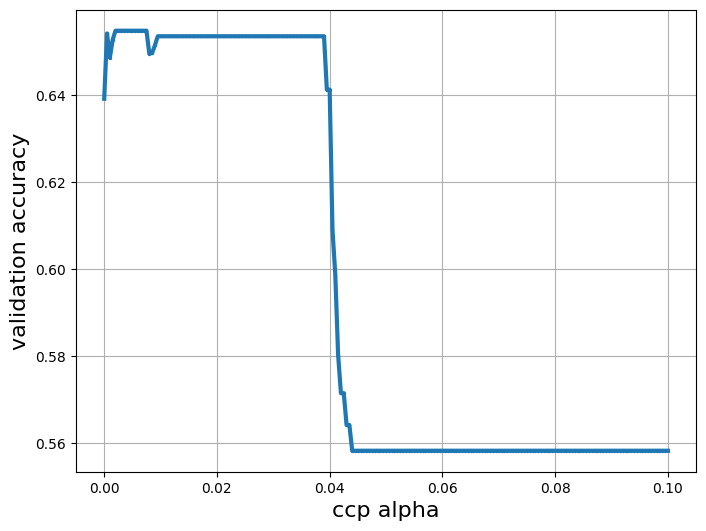

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('validation accuracy', fontsize=16)
plt.scatter(ccp2, acc2, s=2)
plt.plot(ccp2, acc2, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [ ]:
print('Grid best parameter ccp_alpha (max.accuracy): ', dtc. best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc.best_score_)

Grid best parameter ccp_alpha (max.accuracy):  0.002
Grid best score (accuracy):  0.6548146567925315


##Q2dv

Baseline Model

In [ ]:
train['fourOrAbove'].value_counts()
test['fourOrAbove'].size

2688

In [ ]:
baseline_pred = np.repeat(0, 2688)
baseline_performance = confusion_matrix(y_test2, baseline_pred)
baseline_performance

array([[1505,    0],
       [1183,    0]])

In [ ]:
TN = baseline_performance.ravel()[0]
FP = baseline_performance.ravel()[1]
FN = baseline_performance.ravel()[2]
TP = baseline_performance.ravel()[3]

In [ ]:
total = TP + TN + FN + FP
accuracy = (TP + TN) / total
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
print('The accuracy of the baseline model is', accuracy)
print('The TPR of the baseline model is', tpr)
print('The FPR of the baseline model is', fpr)

The accuracy of the baseline model is 0.5598958333333334
The TPR of the baseline model is 0.0
The FPR of the baseline model is 0.0


Linear Regression Model

In [ ]:
linear_pred = bi.predict(test)
linear_pred_four = (linear_pred >= 4).astype(int)
linear_reg_cm = confusion_matrix(y_test2, linear_pred_four)
linear_reg_cm

array([[1447,   58],
       [ 930,  253]])

In [ ]:
TN2 = linear_reg_cm.ravel()[0]
FP2 = linear_reg_cm.ravel()[1]
FN2 = linear_reg_cm.ravel()[2]
TP2 = linear_reg_cm.ravel()[3]

In [ ]:
total2 = TP2 + TN2 + FN2 + FP2
accuracy2 = (TP2 + TN2) / total2
tpr2 = TP2 / (TP2 + FN2)
fpr2 = FP2 / (FP2 + TN2)
print('The accuracy of the Linear Regression Model is', accuracy2)
print('The TPR of the Linear Regression Model is', tpr2)
print('The FPR of the Linear Regression Model is', fpr2)

The accuracy of the Linear Regression Model is 0.6324404761904762
The TPR of the Linear Regression Model is 0.21386306001690616
The FPR of the Linear Regression Model is 0.038538205980066444


Logistic Regression Model

In [ ]:
logreg_prediction = logreg1.predict(test)
logreg_pred_fourorabove = (logreg_prediction > .5).astype(int)
logreg_cm = confusion_matrix(y_test2, logreg_pred_fourorabove)
logreg_cm

array([[1250,  255],
       [ 616,  567]])

In [ ]:
TN4 = logreg_cm.ravel()[0]
FP4 = logreg_cm.ravel()[1]
FN4 = logreg_cm.ravel()[2]
TP4 = logreg_cm.ravel()[3]

In [ ]:
total4 = TP4 + TN4 + FN4 + FP4
accuracy4 = (TP4 + TN4) / total4
tpr4 = TP4 / (TP4 + FN4)
fpr4 = FP4 / (FP4 + TN4)
print('The accuracy of the Regression Tree Model is', accuracy4)
print('The TPR of the Regression Tree Model is', tpr4)
print('The FPR of the Regression Tree Model is', fpr4)

The accuracy of the Regression Tree Model is 0.6759672619047619
The TPR of the Regression Tree Model is 0.47928994082840237
The FPR of the Regression Tree Model is 0.16943521594684385


Regression Tree Model

In [ ]:
regression_tree_prediction_stars = dtc_cv_acc.best_estimator_.predict(x_test)
regression_tree_predictions_fourorabove = (regression_tree_prediction_stars >=4).astype(int)
reg_tree_performance = confusion_matrix(y_test2, regression_tree_predictions_fourorabove)
reg_tree_performance

array([[1437,   68],
       [ 938,  245]])

In [ ]:
TN3 = reg_tree_performance.ravel()[0]
FP3 = reg_tree_performance.ravel()[1]
FN3 = reg_tree_performance.ravel()[2]
TP3 = reg_tree_performance.ravel()[3]

In [ ]:
total3 = TP3 + TN3 + FN3 + FP3
accuracy3 = (TP3 + TN3) / total3
tpr3 = TP3 / (TP3 + FN3)
fpr3 = FP3 / (FP3 + TN3)
print('The accuracy of the Regression Tree Model is', accuracy3)
print('The TPR of the Regression Tree Model is', tpr3)
print('The FPR of the Regression Tree Model is', fpr3)

The accuracy of the Regression Tree Model is 0.6257440476190477
The TPR of the Regression Tree Model is 0.20710059171597633
The FPR of the Regression Tree Model is 0.045182724252491695


Classification Tree Model

In [ ]:
classification_tree_pred = dtc.best_estimator_.predict(x_test2)
classification_tree_cm = confusion_matrix(y_test2,classification_tree_pred)
classification_tree_cm

array([[1124,  381],
       [ 540,  643]])

In [ ]:
TN5 = classification_tree_cm.ravel()[0]
FP5 = classification_tree_cm.ravel()[1]
FN5 = classification_tree_cm.ravel()[2]
TP5 = classification_tree_cm.ravel()[3]

In [ ]:
total5 = TP5 + TN5 + FN5 + FP5
accuracy5 = (TP5 + TN5) / total5
tpr5 = TP5 / (TP5 + FN5)
fpr5 = FP5 / (FP5 + TN5)
print('The accuracy of the Regression Tree Model is', accuracy5)
print('The TPR of the Regression Tree Model is', tpr5)
print('The FPR of the Regression Tree Model is', fpr5)

The accuracy of the Regression Tree Model is 0.6573660714285714
The TPR of the Regression Tree Model is 0.5435333896872359
The FPR of the Regression Tree Model is 0.253156146179402
